In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.preprocessing import image
from keras.utils import np_utils
## --------------------------------------------
import pandas as pd
import numpy as np

In [ ]:

!pip install keras==2.1.1

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
(x_train.shape,x_test.shape)
(y_train.shape,y_test.shape)

((50000, 1), (10000, 1))

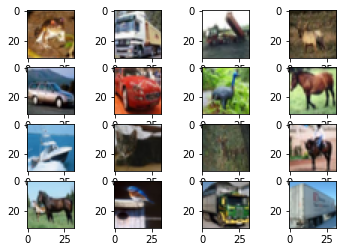

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
m=4
k=0
plt.figure(1)
for i in range(0,m):
  for j in range(0,m):
    plt.subplot2grid((m,m),(i,j))
    plt.imshow(x_train[k])
    k=k+1
plt.show()


In [ ]:
x_train = x_train.reshape(50000, 32, 32, 3).astype('float32')

x_test = x_test.reshape(10000, 32, 32, 3).astype('float32')

x_train/=255

x_test/=255
print("Data setelah di-normalisasi ", x_train[0][0][0])
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data setelah di-normalisasi  [0.23137255 0.24313726 0.24705882]
Data setelah di-normalisasi  [0.61960787 0.4392157  0.19215687]


In [ ]:
def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()

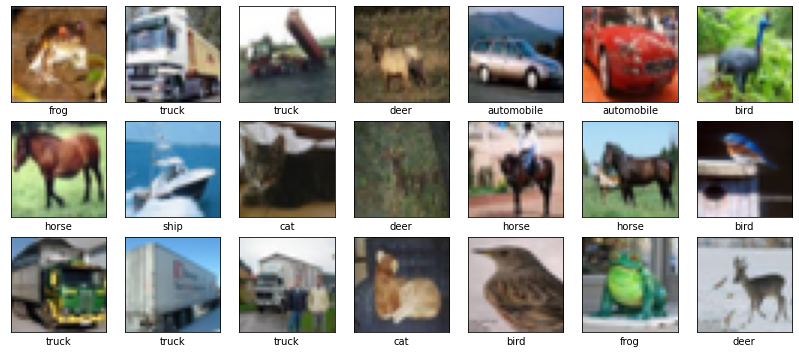

In [ ]:
from tensorflow.keras.utils import to_categorical
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255.0
y_train = to_categorical(y_train, num_classes)

X_test = X_test / 255.0
y_test = to_categorical(y_test, num_classes)

visualize_data(X_train, y_train, class_names)

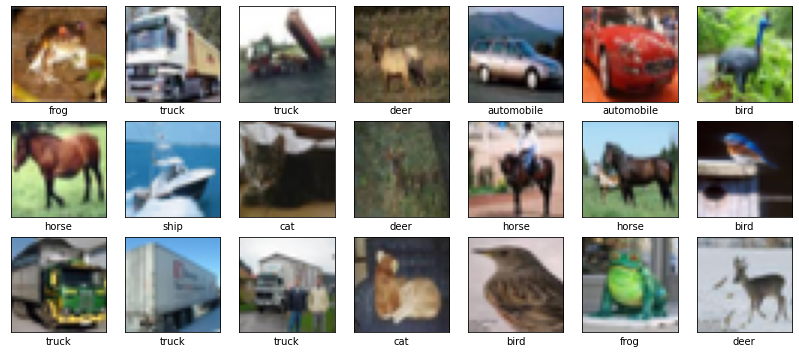

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(x_train)

it = datagen.flow(x_train, y_train, shuffle=False)
batch_images, batch_labels = next(it)
visualize_data(x_train, y_train, class_names)

In [ ]:

y_train = np_utils.to_categorical(y_train, num_classes=100)
y_test = np_utils.to_categorical(y_test, num_classes=100)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


In [ ]:
Pertama = Sequential()

Pertama.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))

Pertama.add(MaxPool2D(pool_size=(2,2)))

Pertama.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

Pertama.add(MaxPool2D(pool_size=(2,2)))
Pertama.add(Dropout(0.25))
Pertama.add(BatchNormalization())
Pertama.add(Flatten())

Pertama.add(Dense(units=1024, activation='relu'))
Pertama.add(Dense(units=256, activation='relu'))
Pertama.add(Dense(units=256, activation='relu'))
Pertama.add(Dense(units=100, activation='softmax'))

learning_rate=0.00001

Pertama.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

gerador_imagens = ImageDataGenerator(rotation_range=7,
                                     horizontal_flip = True,
                                     shear_range = 0.2,
                                     height_shift_range = 0.07,
                                     zoom_range = 0.2)
gerador_teste = ImageDataGenerator()

base_treinamento = gerador_imagens.flow(x_train, y_train, batch_size=128)
base_teste = gerador_teste.flow(x_test, y_test, batch_size=128)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:368: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H =Pertama.fit_generator(base_treinamento, steps_per_epoch=5000/128, epochs=100, validation_data=base_teste, validation_steps=10000/128)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
39/39 [==============================] - 5s 114ms/step - loss: 2146.4094 - accuracy: 0.0000e+00 - val_loss: 2076.6631 - val_accuracy: 0.0000e+00
Epoch 2/100
39/39 [==============================] - 4s 107ms/step - loss: 2129.7056 - accuracy: 0.0000e+00 - val_loss: 2078.7188 - val_accuracy: 0.0000e+00
Epoch 3/100
39/39 [==============================] - 4s 108ms/step - loss: 2204.0903 - accuracy: 0.0000e+00 - val_loss: 2084.4314 - val_accuracy: 0.0000e+00
Epoch 4/100
39/39 [==============================] - 4s 108ms/step - loss: 2270.7256 - accuracy: 0.0000e+00 - val_loss: 2099.4829 - val_accuracy: 0.0000e+00
Epoch 5/100
39/39 [==============================] - 4s 106ms/step - loss: 2396.8979 - accuracy: 0.0000e+00 - val_loss: 2139.6646 - val_accuracy: 0.0000e+00
Epoch 6/100
39/39 [==============================] - 4s 108ms/step - loss: 2764.4067 - accuracy: 0.0000e+00 - val_loss: 2247.6345 - val_accuracy: 0.0000e+00
Epoch 7/100
39/39 [==============================] - 4s 10

In [ ]:
Pertama.evaluate(x_test, y_test)

NameError: ignored

In [ ]:
kedua = Sequential()

kedua.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))

kedua.add(AveragePooling2D(pool_size=(2,2)))

kedua.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

kedua.add(AveragePooling2D(pool_size=(2,2)))
kedua.add(GlobalAveragePooling2D())
kedua.add(Dropout(0.25))
kedua.add(BatchNormalization())
kedua.add(Flatten())

kedua.add(Dense(units=1024, activation='relu'))
kedua.add(Dense(units=256, activation='relu'))
kedua.add(Dense(units=256, activation='relu'))
kedua.add(Dense(units=100, activation='softmax'))

learning_rate=0.00001

kedua.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

gerador_imagens = ImageDataGenerator(rotation_range=7,
                                     horizontal_flip = True,
                                     shear_range = 0.2,
                                     height_shift_range = 0.07,
                                     zoom_range = 0.2)

gerador_teste = ImageDataGenerator()

base_treinamento = gerador_imagens.flow(x_train, y_train, batch_size=128)
base_teste = gerador_teste.flow(x_test, y_test, batch_size=128)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:368: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H2 = kedua.fit_generator(base_treinamento, steps_per_epoch=5000/128, epochs=100, validation_data=base_teste, validation_steps=10000/128)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
39/39 [==============================] - 5s 117ms/step - loss: 2077.9133 - accuracy: 0.0000e+00 - val_loss: 2072.3611 - val_accuracy: 0.0000e+00
Epoch 2/100
39/39 [==============================] - 4s 108ms/step - loss: 2048.7690 - accuracy: 0.0000e+00 - val_loss: 2072.4033 - val_accuracy: 0.0000e+00
Epoch 3/100
39/39 [==============================] - 4s 108ms/step - loss: 2075.3257 - accuracy: 0.0000e+00 - val_loss: 2072.5322 - val_accuracy: 0.0000e+00
Epoch 4/100
39/39 [==============================] - 4s 111ms/step - loss: 2083.1777 - accuracy: 0.0000e+00 - val_loss: 2072.8977 - val_accuracy: 0.0000e+00
Epoch 5/100
39/39 [==============================] - 4s 108ms/step - loss: 2080.8069 - accuracy: 0.0000e+00 - val_loss: 2073.9211 - val_accuracy: 0.0000e+00
Epoch 6/100
39/39 [==============================] - 4s 108ms/step - loss: 2108.1426 - accuracy: 0.0000e+00 - val_loss: 2076.9290 - val_accuracy: 0.0000e+00
Epoch 7/100
39/39 [==============================] - 4s 10

In [ ]:
kedua.evaluate(x_test, y_test)

In [ ]:
kedua.save("model3.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
Pertama.save("model4.h5")
print("Saved model to disk")

NameError: ignored